<center>
<h4>Diplomatura en CDAAyA 2019 - FaMAF - UNC</h4>
<h1>Predicción del Nivel de Pobreza de Hogares en Costa Rica</h1>
<h3>Exploración y Curación</h3>
</center>
</left>
<h4>Sofía Luján</h4>
<h4>Mariano Ramirez</h4>
</left>

### Introducción

En la siguiente notebook, se presentará la consigna a seguir para el segundo práctico de la materia Exploración y Curación. El objetivo consiste en identificar e implementar los pasos necesarios para la limpieza de la base de datos de pobreza en hogares de Costa Rica, así como también analizar cruces de datos con mayor profundidad y validando el sentido lógico. Para ello, comenzaremos con las importaciones pertinentes.

### Importaciones

In [2]:
# Importación de las librerías necesarias
import numpy as np
import pandas as pd
# Puede que nos sirvan también
import matplotlib as mpl
mpl.get_cachedir()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
pd.set_option('display.max_columns', 150)
pd.set_option('display.max_rows', 150)
pd.set_option('max_colwidth', 151)

## Consigna para Curación y Exploración del Dataset

### I. Rutina de Curación

Inicialmente, con el objetivo de preparar los datos que alimentarán futuros modelos de aprendizaje automático (ML), se propone seguir la siguiente __[checklist](https://dimewiki.worldbank.org/wiki/Checklist:_Data_Cleaning)__ para la limpieza de los datos de nuestro proyecto. Esta _checklist_ es la misma que utilizaron en el primer práctico de la materia y nos será de utilidad como guía para curar el dataset. A modo de ayuda, **en esta notebook encontrarán una especie de template** que sigue la _checklist_ y que deberán ir completando.

**Cada decisión tomada deberá quedar registrada de manera explícita y clara.** Luego de pasar por todos los puntos de la _checklist_ propuesta, deberán almacenar en un nuevo archivo los datos resultantes. Adicionalmente, deben tener en cuenta que las acciones de limpieza que realicen sobre este dataset también deberán ser implementadas sobre el dataset de test (que, por el momento, no ha sido disponibilizado).

A los fines de realizar este práctico, se utilizará el dataset original, pero descartando todas aquellas columnas que se hayan calculado en base a features preexistentes, ya que éstas están relacionadas a decisiones que adoptaremos más adelante, como por ejemplo, sobre si es necesario crear nuevas features y si incluirlas o no. Recuerden que la ciencia de datos es un **proceso circular, continuo y no lineal**. Es decir, si los datos requieren de mayor procesamiento para satisfacer las necesidades de algoritmos de ML (cualesquiera de ellos), vamos a volver a la etapa inicial para, por ejemplo, crear nuevas features, tomar decisiones diferentes sobre valores faltantes o valores atípicos (outliers), descartar features, entre otras.

### II. Análisis en Profundidad del Contenido

Una vez aplicada la _Checklist_, lo que vamos a hacer es profundizar aún más el análisis y tomar decisiones que se consideren pertinentes, si es que no lo han hecho aún en el desarrollo del primer apartado. Por supuesto, se deberán registrar todas las decisiones que tomen al respecto.

Al finalizar con el práctico, las preguntas listadas a continuación deberán quedar respondidas, mientras que si ya lo hicieron durante el desarrollo de la ´checklist´, el objetivo es que se replanteen las decisiones tomadas al respecto:

1. Hay tres features que, por su descripción, deberían ser numéricas: `dependency`, `edjefe` y `edjefa`. Sin embargo, el tipo de dato de estos campos es 'Objeto'. Obtener los valores únicos, analizar por qué no son numéricos y decidir cómo se transformarán a numéricos, teniendo en cuenta su significado.

2. Comparar los campos `tamhog` y `hhsize`. ¿Qué información nos da cada una? ¿Qué deberíamos hacer al respecto? ¿Qué diferencia hay con el campo `r4t3`?

3. ¿Qué ocurre con las rentas (`v2a1`) outliers? ¿Son razonables? ¿Mantenemos o descartamos estos registros?

4. ¿Para qué casos de las variables TipoVivienda (`tipovivi`) no existe renta? ¿Es un si y solo si? Es decir, por ejemplo, si son propietarios, nunca hay valor en el campo renta, mientras que si no lo son, siempre hay valor. En caso de que esto no sea así, ¿es razonable? ¿Qué decisión tomarían al respecto?

5. ¿Qué decidieron respecto a los valores faltantes de la renta? Una **propuesta que podría considerarse interesante** es completar tales valores faltantes con el **costo de oportunidad** de los propietarios de ese hogar. Es decir, ese hogar está dejando de percibir una renta igual a $x$ por estar habitando esa vivienda. Por lo tanto, ese costo de oportunidad puede estimarse de acuerdo al valor de la renta de viviendas similares, en base a múltiples criterios, como por ejemplo: zona, región, tipo de construcción, acceso a servicios y todas las características que ustedes consideren pertinentes. Esto quedará a su criterio. ¿Cuál es el único feature que no deberíamos usar para obtener el costo de oportunidad y por qué?

6. ¿Qué datos se repiten para `idhogar` y cuáles no? ¿Tiene sentido?

7. Si contamos la cantidad de individuos entrevistados por hogar, ¿coincide con el tamaño del hogar? ¿Y coincide con la suma de las variables que indican cantidad de personas? ¿Qué se puede hacer en los casos en que no?

8. Considerando los campos `rooms` y `bedrooms`, debería haber al menos tantos ambientes como habitaciones o bien más. Comprobar si esto es así efectivamente. Si no lo fuera, ¿puede ser un error de carga? ¿Cómo lo solucionarían?

9. ¿Todos los `idhogar` tienen jefa o jefe de hogar? (`parentesco1` == 1) Si esto no ocurre, ¿qué harían con los hogares que no tienen?

Esta lista es extensa e intenta abarcar todas las posibles irregularidades en los datos, pero puede no ser exhaustiva. **Cualquier análisis adicional de consistencia que deseen agregar porque lo consideran pertinente, será bienvenido y valorado.**

### Entregables

El entregable de este práctico consiste en esta misma Notebook, pero con la _checklist_ realizada y el análisis de contenido completo, explicando las decisiones tomadas en cada etapa. Además, deberán elaborar un script que contenga una función para curar nuevos datos con la misma estructura. Finalmente, deberán actualizar la metadata.

# Resolución

## I. Rutina de Curación

### 1. Importación de Datos

#### 1.1. Verificación de Inexistencia de Problemas en la Importación

Para comenzar, importamos los datos que vamos a procesar:

In [ ]:
# Cargamos el Dataset original en una variable
# url = 'https://github.com/jbergamasco/DiploDatos2019/raw/master/ProyectoPobrezaCostaRica/DatasetPobCR_Train.txt'
url_data = 'https://github.com/jbergamasco/DiploDatos2019/raw/master/ProyectoPobrezaCostaRica/DatasetPobCR_Train.csv'
ds = pd.read_csv(url_data)
ds.head()

In [ ]:
# Cargamos el Dataset Fields en una variable, para tener la información de cada campo
url_fields_info = 'https://raw.githubusercontent.com/solujan/DiploDatos2019/master/ProyectoPobrezaCostaRica/Dataset%20Fields.csv'
_data_fields = pd.read_csv(url_fields_info, sep=';')
_data_fields

Recuerden que la variable `Target` constituye nuestro objetivo de predicción. Es la etiqueta de los datos de acuerdo al nivel de pobreza del hogar que habitan, según la siguiente escala o clases:

1 = pobreza extrema<br>
2 = pobreza moderada<br>
3 = hogares vulnerables<br>
4 = hogares no vulnerables<br>

In [6]:
# Eliminamos columnas que son features calculadas en base a otros features
_calc_feat = ds.loc[:,'SQBescolari':'agesq'].columns
print('Columnas eliminadas: ', _calc_feat.values)
ds.drop(columns = _calc_feat, inplace = True)

Columnas eliminadas:  ['SQBescolari' 'SQBage' 'SQBhogar_total' 'SQBedjefe' 'SQBhogar_nin'
 'SQBovercrowding' 'SQBdependency' 'SQBmeaned' 'agesq']


Tomamos una muestra aleatoria para ver valores más dispersos.

In [7]:
# Fijar seed para asegurar reproducibilidad
np.random.seed(0)
ds.sample(10)

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,r4h3,r4m1,r4m2,r4m3,r4t1,r4t2,r4t3,tamhog,tamviv,escolari,rez_esc,hhsize,paredblolad,paredzocalo,paredpreb,pareddes,paredmad,paredzinc,paredfibras,paredother,pisomoscer,pisocemento,pisoother,pisonatur,pisonotiene,pisomadera,techozinc,techoentrepiso,techocane,techootro,cielorazo,abastaguadentro,abastaguafuera,abastaguano,public,planpri,noelec,coopele,sanitario1,sanitario2,sanitario3,sanitario5,sanitario6,energcocinar1,energcocinar2,energcocinar3,energcocinar4,elimbasu1,elimbasu2,elimbasu3,elimbasu4,elimbasu5,elimbasu6,epared1,epared2,epared3,etecho1,etecho2,etecho3,eviv1,eviv2,eviv3,dis,male,female,estadocivil1,estadocivil2,estadocivil3,estadocivil4,estadocivil5,estadocivil6,estadocivil7,parentesco1,parentesco2,parentesco3,parentesco4,parentesco5,parentesco6,parentesco7,parentesco8,parentesco9,parentesco10,parentesco11,parentesco12,idhogar,hogar_nin,hogar_adul,hogar_mayor,hogar_total,dependency,edjefe,edjefa,meaneduc,instlevel1,instlevel2,instlevel3,instlevel4,instlevel5,instlevel6,instlevel7,instlevel8,instlevel9,bedrooms,overcrowding,tipovivi1,tipovivi2,tipovivi3,tipovivi4,tipovivi5,computer,television,mobilephone,qmobilephone,lugar1,lugar2,lugar3,lugar4,lugar5,lugar6,area1,area2,age,Target
4319,ID_c9fdb7266,NaN,0,6,0,1,1,0,NaN,0,2,2,0,2,2,0,4,4,4,4,11,NaN,4,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,c92ca11d1,1,3,0,4,.33333334,no,6,9.333333,0,0,0,0,1,0,0,0,0,3,1.333333,0,0,0,0,1,1,1,1,4,1,0,0,0,0,0,1,0,25,4
3883,ID_fd6cc8def,NaN,0,4,0,1,1,1,1.0,0,0,0,0,2,2,0,2,2,2,2,14,NaN,2,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,72524240f,0,2,0,2,no,no,14,14.000000,0,0,0,0,0,0,0,1,0,2,1.000000,1,0,0,0,0,0,0,1,2,1,0,0,0,0,0,1,0,57,4
3775,ID_85d5cd65c,180000.0,0,4,0,1,1,1,2.0,1,1,2,1,1,2,2,2,4,4,4,15,NaN,4,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,006031de3,2,2,0,4,yes,15,no,15.500000,0,0,0,0,0,0,0,1,0,2,2.000000,0,0,1,0,0,0,0,1,2,1,0,0,0,0,0,1,0,39,4
1519,ID_c230376ae,NaN,0,5,0,1,1,1,2.0,0,1,1,1,1,2,1,2,3,3,3,12,NaN,3,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,c0480739d,2,1,0,3,2,no,16,28.000000,0,0,0,0,0,0,1,0,0,3,1.000000,1,0,0,0,0,0,1,1,3,1,0,0,0,0,0,1,0,19,4
8810,ID_991b84866,NaN,0,4,0,1,1,0,NaN,1,1,2,1,1,2,2,2,4,4,4,5,0.0,4,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,a8dcd4364,2,2,0,4,yes,9,no,9.500000,0,1,0,0,0,0,0,0,0,2,2.000000,1,0,0,0,0,0,0,1,4,0,0,0,0,0,1,1,0,11,2
4398,ID_6846cbaac,NaN,0,6,0,1,1,0,NaN,0,2,2,0,2,2,0,4,4,4,4,6,NaN,4,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,3677a8765,0,4,3,4,3,no,6,4.500000,0,0,1,0,0,0,0,0,0,3,1.333333,1,0,0,0,0,0,1,1,3,1,0,0,0,0,0,1,0,33,4
6632,ID_af3dd1bd2,NaN,0,7,0,1,1,1,1.0,0,0,0,1,2,3,1,2,3,3,3,12,NaN,3,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,351a9fd58,1,2,1,3,2,no,6,9.000000,0,0,0,0,0,0,1,0,0,3,1.000000,1,0,0,0,0,0,1,1,2,0,0,1,0,0,0,1,0,51,3
5790,ID_b6889eed0,NaN,0,3,0,1,1,0,NaN,0,1,1,0,2,2,0,3,3,3,3,11,NaN,3,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,ef6b27244,1,2,0,3,.5,no,8,15.000000,0,0,0,0,1,0,0,0,0,1,3.000000,1,0,0,0,0,0,0,1,3,0,1,0,0,0,0,1,0,58,1
3978,ID_22886534c,NaN,0,4,0,1,1,0,NaN,1,3,4,1,1,2,2,4,6,6,6,7,NaN,6,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0


Veamos los tipos de datos que tenemos

In [8]:
cat = len(ds.select_dtypes(include=['object']).columns)
num = len(ds.select_dtypes(include=['int64','float64']).columns)
print('Total Features: ', cat, 'objetos', '+',
      num, 'numerical', '=', cat+num, 'features')

Total Features:  5 objetos + 129 numerical = 134 features


Verificamos los tipos de datos objeto, el porque estan hay y que tipo de datos deberian ser.

Lo primero que notamos es que la edjefe, edjefa y dependency. 

*  Segun la descrićión de las columnas dependency, es un campo calculado, y no deberia tener valores como yes o no.

*   edjefe y edjefa, que son el nivel de educación del jefe y de la jefa, tienen mezcla de valores numericos, y no numericos como "no" y "yes"

Considero que se deben descartar y volver a ser calculadas despues de manera adecuada. 


In [9]:
print(ds.edjefe.unique())
print(ds.edjefa.unique())
print(ds.dependency.unique())
print(ds.select_dtypes(include=['object']).describe())

['10' '12' 'no' '11' '9' '15' '4' '6' '8' '17' '7' '16' '14' '5' '21' '2'
 '19' 'yes' '3' '18' '13' '20']
['no' '11' '4' '10' '9' '15' '7' '14' '13' '8' '17' '6' '5' '3' '16' '19'
 'yes' '21' '12' '2' '20' '18']
['no' '8' 'yes' '3' '.5' '.25' '2' '.66666669' '.33333334' '1.5'
 '.40000001' '.75' '1.25' '.2' '2.5' '1.2' '4' '1.3333334' '2.25'
 '.22222222' '5' '.83333331' '.80000001' '6' '3.5' '1.6666666' '.2857143'
 '1.75' '.71428573' '.16666667' '.60000002']
                  Id    idhogar dependency edjefe edjefa
count           9557       9557       9557   9557   9557
unique          9557       2988         31     22     22
top     ID_d50087b22  fd8a6d014        yes     no     no
freq               1         13       2192   3762   6230


In [10]:
ds[["Id","idhogar", "dependency","age","edjefe", "edjefa", "parentesco1", "escolari"]].head(10)

,Id,idhogar,dependency,age,edjefe,edjefa,parentesco1,escolari
0,ID_279628684,21eb7fcc1,no,43,10,no,1,10
1,ID_f29eb3ddd,0e5d7a658,8,67,12,no,1,12
2,ID_68de51c94,2c7317ea8,8,92,no,11,1,11
3,ID_d671db89c,2b58d945f,yes,17,11,no,0,9
4,ID_d56d6f5f5,2b58d945f,yes,37,11,no,0,11
5,ID_ec05b1a7b,2b58d945f,yes,38,11,no,1,11
6,ID_e9e0c1100,2b58d945f,yes,8,11,no,0,2
7,ID_3e04e571e,d6dae86b7,yes,7,9,no,0,0
8,ID_1284f8aad,d6dae86b7,yes,30,9,no,1,9
9,ID_51f52fdd2,d6dae86b7,yes,28,9,no,0,11


In [11]:
#Elimino aoarte de edjefe, edjega y dependency. meaneduc ya que tambien es una variable calculada. 
ds.drop(columns =["edjefe", "edjefa", "dependency", "meaneduc"], inplace = True)
cat = len(ds.select_dtypes(include=['object']).columns)
num = len(ds.select_dtypes(include=['int64','float64']).columns)
print('Total Features: ', cat, 'objetos', '+',
      num, 'numerical', '=', cat+num, 'features')

Total Features:  2 objetos + 128 numerical = 130 features


Y veamos el resumen de los datos

In [12]:
ds.describe(include='all')

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,r4h3,r4m1,r4m2,r4m3,r4t1,r4t2,r4t3,tamhog,tamviv,escolari,rez_esc,hhsize,paredblolad,paredzocalo,paredpreb,pareddes,paredmad,paredzinc,paredfibras,paredother,pisomoscer,pisocemento,pisoother,pisonatur,pisonotiene,pisomadera,techozinc,techoentrepiso,techocane,techootro,cielorazo,abastaguadentro,abastaguafuera,abastaguano,public,planpri,noelec,coopele,sanitario1,sanitario2,sanitario3,sanitario5,sanitario6,energcocinar1,energcocinar2,energcocinar3,energcocinar4,elimbasu1,elimbasu2,elimbasu3,elimbasu4,elimbasu5,elimbasu6,epared1,epared2,epared3,etecho1,etecho2,etecho3,eviv1,eviv2,eviv3,dis,male,female,estadocivil1,estadocivil2,estadocivil3,estadocivil4,estadocivil5,estadocivil6,estadocivil7,parentesco1,parentesco2,parentesco3,parentesco4,parentesco5,parentesco6,parentesco7,parentesco8,parentesco9,parentesco10,parentesco11,parentesco12,idhogar,hogar_nin,hogar_adul,hogar_mayor,hogar_total,instlevel1,instlevel2,instlevel3,instlevel4,instlevel5,instlevel6,instlevel7,instlevel8,instlevel9,bedrooms,overcrowding,tipovivi1,tipovivi2,tipovivi3,tipovivi4,tipovivi5,computer,television,mobilephone,qmobilephone,lugar1,lugar2,lugar3,lugar4,lugar5,lugar6,area1,area2,age,Target
count,9557,2.697000e+03,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,2215.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,1629.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.00000,9557.000000,9557.000000,9557.0,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.00000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000
unique,9557,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2988,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,ID_d50087b22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fd8a6d014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

### 1.2. Asegurar la Existencia de IDs o Claves Únicas

El siguiente paso implica chequear que no existen datos duplicados y que las claves, si existen, son únicas.

Claves únicas son id hogar y id individuo.

Como Pandas acepta valores duplicados en los índices también debemos verificar ahí

In [13]:
ds[ds.index.duplicated()]

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,r4h3,r4m1,r4m2,r4m3,r4t1,r4t2,r4t3,tamhog,tamviv,escolari,rez_esc,hhsize,paredblolad,paredzocalo,paredpreb,pareddes,paredmad,paredzinc,paredfibras,paredother,pisomoscer,pisocemento,pisoother,pisonatur,pisonotiene,pisomadera,techozinc,techoentrepiso,techocane,techootro,cielorazo,abastaguadentro,abastaguafuera,abastaguano,public,planpri,noelec,coopele,sanitario1,sanitario2,sanitario3,sanitario5,sanitario6,energcocinar1,energcocinar2,energcocinar3,energcocinar4,elimbasu1,elimbasu2,elimbasu3,elimbasu4,elimbasu5,elimbasu6,epared1,epared2,epared3,etecho1,etecho2,etecho3,eviv1,eviv2,eviv3,dis,male,female,estadocivil1,estadocivil2,estadocivil3,estadocivil4,estadocivil5,estadocivil6,estadocivil7,parentesco1,parentesco2,parentesco3,parentesco4,parentesco5,parentesco6,parentesco7,parentesco8,parentesco9,parentesco10,parentesco11,parentesco12,idhogar,hogar_nin,hogar_adul,hogar_mayor,hogar_total,instlevel1,instlevel2,instlevel3,instlevel4,instlevel5,instlevel6,instlevel7,instlevel8,instlevel9,bedrooms,overcrowding,tipovivi1,tipovivi2,tipovivi3,tipovivi4,tipovivi5,computer,television,mobilephone,qmobilephone,lugar1,lugar2,lugar3,lugar4,lugar5,lugar6,area1,area2,age,Target


#### Verificación de unicidad de id individuo

In [14]:
ds['Id'].nunique() == ds['Id'].count()

True

**Verificación de la unicidad de idHogar**

EL id de hogar no es unico tiene un id por familia. más adelane se verificara si hay más de una jefe de hogar por familia. Por ahora se sabe que el id de Hogar se repite

In [15]:
ds['idhogar'].nunique() == ds['idhogar'].count()

False

### 1.3. Despersonalizar Datos y Guardarlos en un Nuevo Archivo

En este caso, no es necesario despersonalizar ningún dato, dado que los mismos ya se encuentran despersonalizados.

### 1.4. Nunca Modificar los Datos Crudos u Originales

Al finalizar la limpieza, deberán guardar el dataset resultante, para asegurarse de no modificar los datos originales.

## 2. Pasos de Limpieza Necesarios

### 2.1. Etiquetas de Variables/Columnas y Problemas de Codificación/Encoding

Antes que nada, verificar el encoding de la fuente de datos, leyendo en crudo los primeros 100000 caracteres, por ejemplo:

In [16]:
import chardet

In [17]:
import requests
rawdata = requests.get(url_data)
result = chardet.detect(rawdata.content[:100000])
result

{'encoding': 'UTF-8-SIG', 'confidence': 1.0, 'language': ''}

Analizar los nombres de columnas, utilizando por ejemplo `ds.columns.str.extract(r'^(\w+)$')`.

In [18]:
ds.columns.values

array(['Id', 'v2a1', 'hacdor', 'rooms', 'hacapo', 'v14a', 'refrig',
       'v18q', 'v18q1', 'r4h1', 'r4h2', 'r4h3', 'r4m1', 'r4m2', 'r4m3',
       'r4t1', 'r4t2', 'r4t3', 'tamhog', 'tamviv', 'escolari', 'rez_esc',
       'hhsize', 'paredblolad', 'paredzocalo', 'paredpreb', 'pareddes',
       'paredmad', 'paredzinc', 'paredfibras', 'paredother', 'pisomoscer',
       'pisocemento', 'pisoother', 'pisonatur', 'pisonotiene',
       'pisomadera', 'techozinc', 'techoentrepiso', 'techocane',
       'techootro', 'cielorazo', 'abastaguadentro', 'abastaguafuera',
       'abastaguano', 'public', 'planpri', 'noelec', 'coopele',
       'sanitario1', 'sanitario2', 'sanitario3', 'sanitario5',
       'sanitario6', 'energcocinar1', 'energcocinar2', 'energcocinar3',
       'energcocinar4', 'elimbasu1', 'elimbasu2', 'elimbasu3',
       'elimbasu4', 'elimbasu5', 'elimbasu6', 'epared1', 'epared2',
       'epared3', 'etecho1', 'etecho2', 'etecho3', 'eviv1', 'eviv2',
       'eviv3', 'dis', 'male', 'female', '

Las variables tiene no tienen problemas de enconding.

### 2.2. Tratamiento de Valores Faltantes

Para analizar los valores faltantes, primero deberán saber cuántos existen por campo y cuánto representan del total:

In [19]:
valores_faltantes = pd.DataFrame([ds.isnull().sum(),
                                  ds.isnull().sum()/len(ds)]).transpose().rename(
    columns = {0:'Cantidad_NaN',1:'Porcentaje_Nan_s_Total'})

valores_faltantes.loc[valores_faltantes['Cantidad_NaN']>0].style.format({'Porcentaje_Nan_s_Total':"{:.2%}"})

,Cantidad_NaN,Porcentaje_Nan_s_Total
v2a1,6860,71.78%
v18q1,7342,76.82%
rez_esc,7928,82.95%


In [20]:
_data_fields[_data_fields['Variable_name'].isin(['v2a1','v18q1','rez_esc'])]

,Variable_name,Variable_description
0,v2a1,Monthly rent payment
7,v18q1,number of tablets household owns
20,rez_esc,Years behind in school


#### v2a1:	Monthly rent payment

In [21]:
ds[ds['tipovivi1']==1]['v2a1'].unique()

array([nan])

In [22]:
ds[ds['tipovivi2']==1]['v2a1'].unique()

array([ 100000.,  350000.,  250000.,  564834.,  270000.,  450000.,
        119813.,  180000.,   35000.,  500000.,       0.,  200000.,
        127000.,   52000.,  300000.,  278000.,  150000.,  400000.,
        770229.,  285270.,  110000.,   96000.,  542013.,  140000.,
        280000.,   20000.,  120000.,   55000.,   30000.,  283000.,
        170000.,  510000.,  185000.,  230000.,   36350.,   40000.,
         89000.,  600000.,  550000.,  132000.,  470000.,  260000.,
         27000.,  176000.,  380000.,  855810.,  427905.,  290975.,
        188000., 1000000.,  700000.,  219087.,  130000.,  160000.,
        240000.,  190000.,   50000.,   51000.,  220000.,   68000.,
        175000.,  145000.,  234000.,  570540.,  456432.,  432000.,
         90000.,   45000.,  357000.,  115000.,  253000.,   70000.,
        525000.,  684648.,   72000.,  480000.,   94000.,  159751.,
       2353477.,   14000.,   13000.,   75000.,   78000.,  540000.,
        420000.,   25000.,  328000.,   28000.,   80000.,  2850

In [23]:
ds[ds['tipovivi3']==1]['v2a1'].unique()

array([190000., 135000., 180000., 130000.,  90000., 215000., 150000.,
       100000., 120000.,  80000., 168000.,  40000., 155000., 200000.,
       270000., 300000., 260000., 175000.,  25310., 400000., 399378.,
       125518., 125000.,  60000., 160000., 170000., 230000., 185000.,
       220000., 570540., 342324., 240000.,  70000., 110000., 100297.,
       210000., 350000., 145000.,  65000., 285270.,  85000., 104000.,
       275000., 105661., 250000.,  16000.,  20000., 140000., 245000.,
       191500.,  75000.,  50000.,  84529., 205000.,  30000., 118097.,
       360000., 325000., 450000., 288750.,  35000.,  95000.,  93000.,
        55000., 800000., 456432., 142635.,  97000.,  62539., 225000.,
       105000., 427905.,  78039.,  72554., 165000., 268153.,  92000.,
        52831., 855810., 115000.,  15000., 171162.,  45000., 249896.,
       108000.,  25000.,  12000.,  58731.])

In [24]:
ds[ds['tipovivi4']==1]['v2a1'].unique()

array([nan])

In [25]:
ds[ds['tipovivi5']==1]['v2a1'].unique()

array([nan])

Se observa que solo los tipo vivienda 2 y 3 tienen renta. Los tipo vivienda 2 son aquellos que son propietarios pero pagan una cuota, y los tipo 3 son los que pagan un alquiler. Más adelante se analizará la forma de completar los datos faltantes de esta variable.

#### v18q1: number of tablets household owns

el v18q1 es la cantidad de tablets que hay en el hogar. v18q indica si el individuo posee una tablet (puede tener mas de una). Si se cuenta la cantidad de personas que tienen tablet en el hogar (sum), y se compara con la cantidad informada (v18q1) de tablet, encontramos 3 situaciones:
1. Caso 1: la cantidad informada es menor a la cantidad calculada (varios miembros de un hogar se atribuyen el dominio de la tablet). Total: 2061
2. Caso 2: la cantidad informada es mayor a la calculada (un individuo posea mas de una tablet). Total: 18
3. Caso 3: la cantidad informada es igual a la calculada (lo esperado). Total:  83



In [26]:
#todos los datos de v18q que es si el individuo posee una tablet no son nulos. 
filtered_ds = ds[ds.v18q.isnull()][['Id', 'idhogar','v18q','v18q1']]
print(filtered_ds.shape)

(0, 4)


In [27]:
_data_fields[_data_fields['Variable_name'].isin(['v18q','v18q1'])]

,Variable_name,Variable_description
6,v18q,owns a tablet
7,v18q1,number of tablets household owns


In [28]:
hogares_list = ds.idhogar.unique()
filtered_ds = ds[ds.idhogar.duplicated(keep=False)].sort_values(by='idhogar')[['Id', 'idhogar','v18q','v18q1']]
calculated_ds = filtered_ds.groupby(['idhogar'])['v18q'].sum().reset_index(name='sum')
total_ds = pd.merge(filtered_ds, calculated_ds, left_on='idhogar', right_on='idhogar')

print("Caso 1: ",str(total_ds[total_ds['v18q1']<total_ds['sum']].count()['Id']))
print("Caso 2: ",str(total_ds[total_ds['v18q1']>total_ds['sum']].count()['Id']))
print("Caso 3: ",str(total_ds[total_ds['v18q1']==total_ds['sum']].count()['Id']))



Caso 1:  2061
Caso 2:  18
Caso 3:  83


Tratamiento de valores faltantes: 

Descartaría la variable por las siguientes razones:
* Hay más casos tipo 1, es decir que la cantidad de tablets por hogar es menor a la suma de la cantidad de personas que dicen tener tablets en el hogar. Esto nos da pensar dos cosas: 
** La tablet tiene más de un dueño, es decir que varios individuos se atribuyen el dominio del objeto e incide en la variable v18q, pero no en el v18q1.
** Existen más tablets en el hogar, esto incide en v18q1 pero no en v18q.
* Casos 2, son aquellos que nos permiten decir que el individuo puede llegar a tener más de una tablet. Esto se refleja en cambios en el valor de v18q1, pero no en v18q que solo nos informa si el individuo posee o no una tablet.

En ambos casos casos encontramos inconsistencia en los datos proporcionados, por lo cual se descarta la variable v18q1.
Podria ser interesante incorporar una variable que nos indique la cantidad de individuos que dicen poseer una tablet en un hogar, ya que basados en el estudio anterior, la variable v18q tiene fuerte correlación con la variable target.


#### rez_esc year behind school



In [29]:

ds['rez_esc'].count()


1629

In [30]:
ds[ds['rez_esc'].isna()]['Id'].count()

7928

In [31]:
ds['rez_esc'].describe()

count    1629.000000
mean        0.459791
std         0.946550
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         5.000000
Name: rez_esc, dtype: float64

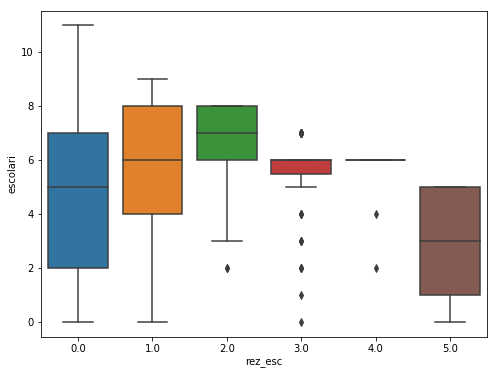

In [32]:
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x='rez_esc', y='escolari', data=ds)

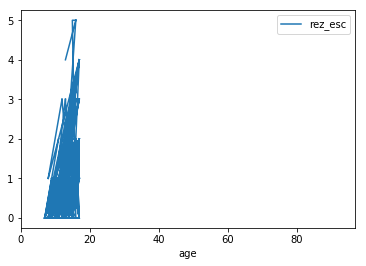

In [33]:

ds.plot(x='age', y='rez_esc')


In [34]:
ds[(ds['age']>17)&(ds.rez_esc.notnull())][['age','rez_esc']]

,age,rez_esc


In [35]:
count_repitencia = ds[(ds['age']<17)&(ds.rez_esc.notnull())][['rez_esc','Target']].groupby('Target')['rez_esc'].count()
young_1 = ds[(ds['age']<17)&(ds.Target == 1)]['Id'].count()
young_2 = ds[(ds['age']<17)&(ds.Target == 2)]['Id'].count()
young_3 = ds[(ds['age']<17)&(ds.Target == 3)]['Id'].count()
young_4 = ds[(ds['age']<17)&(ds.Target == 4)]['Id'].count()
print("Porcentaje de repitencia de jóvenes menores de 17 en hogares de extrema pobreza: ",count_repitencia[1]/young_1*100)
print("Porcentaje de repitencia de jóvenes menores de 17 en hogares de pobreza moderada: ",count_repitencia[2]/young_2*100)
print("Porcentaje de repitencia de jóvenes menores de 17 en hogares vulnerables: ",count_repitencia[3]/young_3*100)
print("Porcentaje de repitencia de jóvenes menores de 17 en hogares no vulnerables: ",count_repitencia[4]/young_4*100)

Porcentaje de repitencia de jóvenes menores de 17 en hogares de extrema pobreza:  56.85618729096989
Porcentaje de repitencia de jóvenes menores de 17 en hogares de pobreza moderada:  62.56684491978609
Porcentaje de repitencia de jóvenes menores de 17 en hogares vulnerables:  64.85714285714286
Porcentaje de repitencia de jóvenes menores de 17 en hogares no vulnerables:  61.60558464223386


Tratamiento de valores faltantes: 

Este campo es la cantidad de años de atraso de educación tiene el individuo. En el último gráfico observamos que los valores no nulos están concentrados en los individuos menores a 17 años. Por lo tanto no sería un indicador de analfabetismo de los jefes de hogar sino que indica el grado de repitencia de los individuos menores a 17 años. Podriamos suponer que el nivel de repitencia es una cuestión de clase social, pero el nivel de repitencia en las distintas clases sociales es de alrededor de 60%.

Creo es esta variable puede ser descartada debido a que nuestro análisis está enfocado en los jefes de hogar. Sabemos que los jefes de hogar tiene una edad mayor a 17 años, por lo que no forma parte de nuesto de objeto de estudio.




### 2.3. Codificación de Variables Categóricas

Aplica?
No aplica, ya que las variables categóricas ya están codificadas.

### 2.4. No Cambiar los Nombres de las Variables de la Fuente de Origen

### 2.5. Verificación de Consistencia de Datos

Este es el paso más analítico, en donde se deben aplicar reglas de integridad.

#### Verificación de tamviv, tamhog, r4t3 y hhzise

Lo primero que verificamos son que tamhog y hhzise son exactamente iguales. No es necesario tener ambos almacenados. 

In [36]:
_data_fields[_data_fields['Variable_name'].isin(['tamhog','hhsize','r4t3','tamviv','hogar_total'])]

,Variable_name,Variable_description
16,r4t3,Total persons in the household
17,tamhog,size of the household
18,tamviv,number of persons living in the household
21,hhsize,household size
98,hogar_total,# of total individuals in the household


¿Es el tamhog igual que el hhsize?  **Si**

In [37]:
print(ds[ds.tamhog != ds.hhsize].shape)

(0, 130)


¿Hay viviendas donde estos valores son diferentes tamviv y r4t3? **Si**

Numero de personas viviendo en la casa

Total de personas en la casa

Para mi este caso se puede dar en los casos donde haya más de un hogar en una vivienda. 

In [38]:
print(ds[ds.tamviv != ds.r4t3].shape)
ds[ds.tamviv != ds.r4t3][["idhogar", 'r4t3','tamviv']].head()

(258, 130)


,idhogar,r4t3,tamviv
130,81cfc3f8c,4,6
131,81cfc3f8c,4,6
132,81cfc3f8c,4,6
133,81cfc3f8c,4,6
195,f1e36c6f8,4,6


¿Hay vivviendas donde estos valores son diferentes tamhog y r4t3? **SI**

Numero de persona viviendo en la casa

Total de personas en la casa

In [39]:
print(ds[ds.tamhog != ds.r4t3].shape)
ds[ds.tamhog != ds.r4t3][["Id", "idhogar",'tamhog', 'r4t3','tamviv']].head()

(48, 130)


,Id,idhogar,tamhog,r4t3,tamviv
497,ID_352fa3f45,57d87865e,1,3,3
640,ID_b4f60b5a2,1d644ed80,3,4,4
641,ID_25a1721ec,1d644ed80,3,4,4
642,ID_9f855369a,1d644ed80,3,4,4
1034,ID_456fc2eb7,fd80dfac4,1,2,2


De estos analisis de integridad lo primero que notamos es que el tamhog, r4t3, tamviv. No son datos fiables y que poseen errores.


Opino que lo mejor seria deshacernos de las filas que no tengan integridad con estos datos o recalcular estos datos en base al numero real de personas que tenemos.

#### Consistencia de integridad de variables r4m3, r4h3, r4t3, r4m2, r4m1, r4m3, r4h2, r4h1 y r4h3

##### Verificación de integridad entre r4m3 + r4h3 = r4t3

Verificamos que la variable r4t3 es la suma de las variables r4m3 y r4h3. Por lo que r4t3 va a ser elimada.

In [40]:
_data_fields[_data_fields['Variable_name'].isin(['r4m3','r4h3','r4t3'])]

,Variable_name,Variable_description
10,r4h3,Total males in the household
13,r4m3,Total females in the household
16,r4t3,Total persons in the household


In [41]:
total_person_household = ds[['r4m3','r4h3','r4t3']]
total_person_household['r4m3_r4h3'] = total_person_household['r4m3']+total_person_household['r4h3']
print("La variable r4t3 es la suma de r4m3 y r4h3: ",total_person_household[total_person_household.r4t3!=total_person_household.r4m3_r4h3].shape[0]==0)

La variable r4t3 es la suma de r4m3 y r4h3:  True


C:\Users\soluj\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


##### Verificación de integridad entre r4m2+ r4m1 = r4m3
Se verifica que la variable r4m3 es la suma de r4m1 y r4m2.

In [42]:
_data_fields[_data_fields['Variable_name'].isin(['r4m1','r4m2','r4m3'])]

,Variable_name,Variable_description
11,r4m1,Females younger than 12 years of age
12,r4m2,Females 12 years of age and older
13,r4m3,Total females in the household


In [43]:
total_female_household = ds[['r4m1','r4m2','r4m3']]
total_female_household['suma'] = total_female_household[['r4m1','r4m2']].sum(axis=1)

print("La variable r4m3 es la suma de r4m1 y r4m2: ",total_female_household[total_female_household.r4m3!=total_female_household.suma].shape[0]==0)

La variable r4m3 es la suma de r4m1 y r4m2:  True


C:\Users\soluj\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


##### Verificación de integridad entre r4h2+ r4h1 = r4h3
Se verifica que la variable r4h3 es la suma de r4h1 y r4h2.

In [44]:
_data_fields[_data_fields['Variable_name'].isin(['r4h1','r4h2','r4h3'])]

,Variable_name,Variable_description
8,r4h1,Males younger than 12 years of age
9,r4h2,Males 12 years of age and older
10,r4h3,Total males in the household


In [45]:
total_male_household = ds[['r4h1','r4h2','r4h3']]
total_male_household['suma'] = total_male_household[['r4h1','r4h2']].sum(axis=1)

print("La variable r4h3 es la suma de r4h1 y r4h2: ",total_male_household[total_male_household.r4h3!=total_male_household.suma].shape[0]==0)

La variable r4h3 es la suma de r4h1 y r4h2:  True


C:\Users\soluj\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


##### Conclusión: 
* r4h1 + r4h2 = r4h3
* r4m1 + r4m2 = r4m3
* r4h3 + r4m3 = r4t3

  
<p style="background-color: #FFFF00">Las variables r4t3, r4m3 y r4h3 son dependientes r4h1, r4h2, r4m1 y r4m2. Por lo que las variables r4t3, r4m3 y r4h3 serán eliminadas.</p>

#### Consistencia de variables hogar_nin, hogar_adul, hogar_mayor y hogar_total

##### Verificación de integridad entre 'hogar_nin', 'hogar_adul',  'hogar_mayor' == 'hogar_total'

Verificamos que la variable hogar_total es igual a la suma de hogar_nin + hogar_adul + hogar_mayor. Encontramos 2028 casos en que esto no se cumple.


In [46]:
_data_fields[_data_fields['Variable_name'].isin(['hogar_nin', 'hogar_adul', 'hogar_mayor','hogar_total'])]

,Variable_name,Variable_description
95,hogar_nin,Number of children 0 to 19 in household
96,hogar_adul,Number of adults in household
97,hogar_mayor,# of individuals 65+ in the household
98,hogar_total,# of total individuals in the household


In [47]:
hogar = ds[['hogar_nin', 'hogar_adul', 'hogar_mayor', 'hogar_total']]
hogar['suma'] = hogar[['hogar_nin', 'hogar_adul', 'hogar_mayor']].sum(axis=1)
hogar[hogar.hogar_total!=hogar.suma].count()

C:\Users\soluj\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


hogar_nin      2028
hogar_adul     2028
hogar_mayor    2028
hogar_total    2028
suma           2028
dtype: int64

##### Verificación de integridad entre 'hogar_nin', 'hogar_adul',== 'hogar_total'

Verificamos que la variable hogar_total es igual a la suma de hogar_nin + hogar_adul. Por lo que se puede mantener las variables hogar_nin y hogar_adult, y se descarta la variable hogar_total.

In [48]:
hogar = ds[['hogar_nin', 'hogar_adul', 'hogar_mayor', 'hogar_total']]
hogar['suma'] = hogar[['hogar_nin', 'hogar_adul']].sum(axis=1)
hogar[hogar.hogar_total!=hogar.suma].count()

C:\Users\soluj\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


hogar_nin      0
hogar_adul     0
hogar_mayor    0
hogar_total    0
suma           0
dtype: int64

#### Consistencia de las variables paredblolad, paredzocalo, paredpreb, pareddes, paredmad, paredzinc, paredfibras y paredother

##### Verificación que al menos uno de las variable pared haya sido elegido por individuo
* paredblolad
* paredzocalo
* paredpreb
* pareddes
* paredmad
* paredzinc
* paredfibras
* paredother

In [49]:
_data_fields[_data_fields['Variable_name'].isin(['paredblolad','paredzocalo','paredpreb','pareddes','paredmad','paredzinc','paredfibras','paredother'])]

,Variable_name,Variable_description
22,paredblolad,=1 if predominant material on the outside wall is block or brick
23,paredzocalo,"=1 if predominant material on the outside wall is socket (wood, zinc or absbesto)"
24,paredpreb,=1 if predominant material on the outside wall is prefabricated or cement
25,pareddes,=1 if predominant material on the outside wall is waste material
26,paredmad,=1 if predominant material on the outside wall is wood
27,paredzinc,=1 if predominant material on the outside wall is zink
28,paredfibras,=1 if predominant material on the outside wall is natural fibers
29,paredother,=1 if predominant material on the outside wall is other


In [50]:
ds.loc[ds[['paredblolad','paredzocalo','paredpreb','pareddes','paredmad','paredzinc','paredfibras','paredother']].sum(axis=1)==False]['Id'].count()

0

##### Verificación que todos los integrantes de la familia tengan el mismo material de la pared asignado 

In [51]:
idhogar_list = pd.Series(ds['idhogar'].unique())
pared_ds = ds[['idhogar','paredblolad','paredzocalo','paredpreb','pareddes','paredmad','paredzinc','paredfibras','paredother']]
id = idhogar_list.apply(lambda x: x if pared_ds[pared_ds.idhogar==x].all().value_counts()[True]!=2 else None)
print("Cantidad de familias sin caracteristicas comunes: ",len(id[id.notnull()]))

Cantidad de familias sin caracteristicas comunes:  0


#### Consistencia de las variables pisomoscer, pisocemento, pisoother, pisonatur, pisonotiene y pisomadera

##### Verificación variable tipo de piso.
* pisomoscer
* pisocemento
* pisoother
* pisonatur
* pisonotiene
* pisomadera
           


In [52]:
_data_fields[_data_fields['Variable_name'].isin(['pisomoscer','pisocemento','pisoother','pisonatur','pisonotiene','pisomadera'])]

,Variable_name,Variable_description
30,pisomoscer,"=1 if predominant material on the floor is mosaic, ceramic, terrazo"
31,pisocemento,=1 if predominant material on the floor is cement
32,pisoother,=1 if predominant material on the floor is other
33,pisonatur,=1 if predominant material on the floor is natural material
34,pisonotiene,=1 if no floor at the household
35,pisomadera,=1 if predominant material on the floor is wood


In [53]:
ds.loc[ds[['pisomoscer','pisocemento','pisoother','pisonatur','pisonotiene','pisomadera']].sum(axis=1)==False]['Id'].count()

0

#####  Verificación que todos los integrantes de la familia tengan el mismo material del piso asignado

In [54]:
idhogar_list = pd.Series(ds['idhogar'].unique())
pared_ds = ds[['idhogar','pisomoscer','pisocemento','pisoother','pisonatur','pisonotiene','pisomadera']]
id = idhogar_list.apply(lambda x: x if pared_ds[pared_ds.idhogar==x].all().value_counts()[True]!=2 else None)
print("Cantidad de familias sin caracteristicas comunes: ",len(id[id.notnull()]))


Cantidad de familias sin caracteristicas comunes:  0


#### Consistencia de las variables techozinc, techoentrepiso, techocane y techootro

##### Verificación variable tipo de techo.
Se encontraron 66 casos en el individuo no tiene asigando un material para el techo. 

* techozinc
* techoentrepiso
* techocane
* techootro

In [55]:
_data_fields[_data_fields['Variable_name'].isin(['techozinc','techoentrepiso','techocane','techootro','cielorazo', 'etecho1', 'etecho2', 'etecho3'])]

,Variable_name,Variable_description
36,techozinc,=1 if predominant material on the roof is metal foil or zink
37,techoentrepiso,"=1 if predominant material on the roof is fiber cement, mezzanine"
38,techocane,=1 if predominant material on the roof is natural fibers
39,techootro,=1 if predominant material on the roof is other
40,cielorazo,=1 if the house has ceiling
66,etecho1,=1 if roof are bad
67,etecho2,=1 if roof are regular
68,etecho3,=1 if roof are good


In [56]:
# Totalindividuos
ds.loc[ds[['techozinc','techoentrepiso','techocane','techootro']].sum(axis=1)==False]['Id'].count()

66

Se observa que son familias de todas las clases. El estado del techo para dichas familias es malo exeptuando una familia que es regular. 
La falta de este valor se puede deber a un problema de dataentry ya que en caso de no existir la opción que se ajuste más a la característica del hogar se podría haber elegido la opción techo otro. 

Se incluye el cielo razo para observar si hubo algún tipo de confusión y se seleccionó dicha opción como material del techo, pero tampoco tiene un valor asignado para estas familias.

In [57]:
ds.loc[ds[['techozinc','techoentrepiso','techocane','techootro','cielorazo']].sum(axis=1)==False][['Target','tamhog','idhogar', 'etecho1', 'etecho2', 'etecho3','techozinc','techoentrepiso','techocane','techootro','cielorazo']].head()

,Target,tamhog,idhogar,etecho1,etecho2,etecho3,techozinc,techoentrepiso,techocane,techootro,cielorazo
166,2,7,71bec40bc,1,0,0,0,0,0,0,0
167,2,7,71bec40bc,1,0,0,0,0,0,0,0
168,2,7,71bec40bc,1,0,0,0,0,0,0,0
169,2,7,71bec40bc,1,0,0,0,0,0,0,0
170,2,7,71bec40bc,1,0,0,0,0,0,0,0


#####  Verificación que todos los integrantes de la familia tengan el mismo material del techo asignado

In [58]:
idhogar_list = pd.Series(ds['idhogar'].unique())
techo_ds = ds[['idhogar','techozinc','techoentrepiso','techocane','techootro']]
id = idhogar_list.apply(lambda x: x if techo_ds[techo_ds.idhogar==x].all().value_counts()[True]!=2 else None)
print("Cantidad de familias sin caracteristicas comunes: ",len(id[id.notnull()]))



Cantidad de familias sin caracteristicas comunes:  19


<span style="border: 4px solid #52A5D8;background-color: #E87079;padding: 12px">66 personas pertenecientes a 19 familias cuyo material del techo es distinto para los miembros de la familia</span>

#### Consistencia de las variables abastaguadentro, abastaguafuera y abastaguano

 ##### Verificación variable abastecimiento de agua.

* abastaguadentro
* abastaguafuera
* abastaguano


In [59]:
_data_fields[_data_fields['Variable_name'].isin(['abastaguadentro','abastaguafuera','abastaguano'])]

,Variable_name,Variable_description
41,abastaguadentro,=1 if water provision inside the dwelling
42,abastaguafuera,=1 if water provision outside the dwelling
43,abastaguano,=1 if no water provision


In [60]:
ds.loc[ds[['abastaguadentro','abastaguafuera','abastaguano']].sum(axis=1)==False]['Id'].count()

0

#####  Verificación que todos los integrantes de la familia tengan el mismo abastecimiento de agua

In [61]:
idhogar_list = pd.Series(ds['idhogar'].unique())
agua_ds = ds[['idhogar','abastaguadentro','abastaguafuera','abastaguano']]
id = idhogar_list.apply(lambda x: x if agua_ds[agua_ds.idhogar==x].all().value_counts()[True]!=2 else None)
print("Cantidad de familias sin caracteristicas comunes: ",len(id[id.notnull()]))



Cantidad de familias sin caracteristicas comunes:  0


#### Consistencia de las variables public, planpri, noelec y coopele

 ##### Verificación variable abastecimiento de electricidad.

* public
* planpri
* noelec
* coopele
 

In [62]:
_data_fields[_data_fields['Variable_name'].isin(['public','planpri','noelec','coopele'])]

,Variable_name,Variable_description
44,public,"=1 electricity from CNFL, ICE, ESPH/JASEC"
45,planpri,=1 electricity from private plant
46,noelec,=1 no electricity in the dwelling
47,coopele,=1 electricity from cooperative


In [63]:
# Totalindividuos
ds.loc[ds[['public','planpri','noelec','coopele']].sum(axis=1)==False]['Id'].count()

15

In [64]:
# Total de familias sin electricidad
len(ds.loc[ds[['public','planpri','noelec','coopele']].sum(axis=1)==False]['idhogar'].unique())

4

In [65]:
ds.loc[ds[['public','planpri','noelec','coopele']].sum(axis=1)==False][['Target','tamhog','idhogar','public','planpri','noelec','coopele']]

,Target,tamhog,idhogar,public,planpri,noelec,coopele
987,1,3,2848ab152,0,0,0,0
988,1,3,2848ab152,0,0,0,0
989,1,3,2848ab152,0,0,0,0
5579,4,2,4774805db,0,0,0,0
5580,4,2,4774805db,0,0,0,0
6477,2,5,f7b421c2c,0,0,0,0
6478,2,5,f7b421c2c,0,0,0,0
6479,2,5,f7b421c2c,0,0,0,0
6480,2,5,f7b421c2c,0,0,0,0
6481,1,5,f7b421c2c,0,0,0,0


#####  Verificación que todos los integrantes de la familia tengan asignados mismo proveedor de electricidad

In [66]:
idhogar_list = pd.Series(ds['idhogar'].unique())
elect_ds = ds[['idhogar','public','planpri','noelec','coopele']]
id = idhogar_list.apply(lambda x: x if elect_ds[elect_ds.idhogar==x].all().value_counts()[True]!=2 else None)
print("Cantidad de familias sin caracteristicas comunes: ",len(id[id.notnull()]))


Cantidad de familias sin caracteristicas comunes:  4


<span style="border: 4px solid #52A5D8;background-color: #E87079;padding: 12px">Hay 4 familias sin proveedor de electricidad asignado.</span>

#### Consistencia de las variables sanitario1, sanitario2, sanitario3, sanitario5 y sanitario6

 Hace referencia a las características del baño en la vivienda.

* sanitario1: no hay baño en la vivienda
* sanitario2: baño conectado a alcantarillado o pozo de agua.
* sanitario3: baño conectado al tanque séptico.
* sanitario5: baño conectado a agujero negro o letrina.
* sanitario6: baño conectado a otro sistema
 

In [67]:
_data_fields[_data_fields['Variable_name'].isin(['sanitario1', 'sanitario2', 'sanitario3', 'sanitario5','sanitario6'])]

,Variable_name,Variable_description
48,sanitario1,=1 no toilet in the dwelling
49,sanitario2,=1 toilet connected to sewer or cesspool
50,sanitario3,=1 toilet connected to septic tank
51,sanitario5,=1 toilet connected to black hole or letrine
52,sanitario6,=1 toilet connected to other system


In [68]:
# Total individuos sin ninguna variable sanitario seleccionada.
ds.loc[ds[['sanitario1', 'sanitario2', 'sanitario3', 'sanitario5','sanitario6']].sum(axis=1)==False]['Id'].count()

0

#####  Verificación que todos los integrantes de la familia tengan asignados mismo variable sanitario elegida.

In [69]:
idhogar_list = pd.Series(ds['idhogar'].unique())
elect_ds = ds[['idhogar','sanitario1', 'sanitario2', 'sanitario3', 'sanitario5','sanitario6']]
id = idhogar_list.apply(lambda x: x if elect_ds[elect_ds.idhogar==x].all().value_counts()[True]!=2 else None)
print("Cantidad de familias sin caracteristicas comunes: ",len(id[id.notnull()]))


Cantidad de familias sin caracteristicas comunes:  0


#### Consistencia de las variables energcocinar1, energcocinar2, energcocinar3 y  energcocinar4 

 Hace referencia a la fuente de energía para cocinar en la vivienda.

* energcocinar1: no hay cocina
* energcocinar2: principal fuente de energía para cocinar es la electricidad.
* energcocinar3: principal fuente de energía para cocinar es el gas.
* energcocinar4: principal fuente de energía para cocinar es carbón o leña.

 

In [ ]:
_data_fields[_data_fields['Variable_name'].isin(['energcocinar1', 'energcocinar2', 'energcocinar3', 'energcocinar4'])]

,Variable_name,Variable_description
53,energcocinar1,=1 no main source of energy used for cooking (no kitchen)
54,energcocinar2,=1 main source of energy used for cooking electricity
55,energcocinar3,=1 main source of energy used for cooking gas
56,energcocinar4,=1 main source of energy used for cooking wood charcoal


In [ ]:
# Total individuos sin ninguna variable energía en cocina seleccionada.
ds.loc[ds[['energcocinar1', 'energcocinar2', 'energcocinar3', 'energcocinar4']].sum(axis=1)==False]['Id'].count()

0

#####  Verificación que todos los integrantes de la familia tengan asignados mismo fuente de energía para cocinar en la vivienda

In [ ]:
idhogar_list = pd.Series(ds['idhogar'].unique())
elect_ds = ds[['idhogar','energcocinar1', 'energcocinar2', 'energcocinar3', 'energcocinar4']]
id = idhogar_list.apply(lambda x: x if elect_ds[elect_ds.idhogar==x].all().value_counts()[True]!=2 else None)
print("Cantidad de familias sin caracteristicas comunes: ",len(id[id.notnull()]))


Cantidad de familias sin caracteristicas comunes:  0


#### Consistencia de las variables  elimbasu1, elimbasu2, elimbasu3, elimbasu4, elimbasu5 y  elimbasu6.

 Hace referencia a la forma de eliminación de la basura en la vivienda:

* elimbasu1: la eliminación de residuos se realiza en camión cisterna.
* elimbasu2: la eliminación de residuos se realiza en hueco o la entierran 
* elimbasu3: la eliminación de residuos se realiza mediante la quema.
* elimbasu4: la eliminación de residuos se realiza en espacios desocupados
* elimbasu5: la eliminación de residuos se realiza en el rio, arroyo o mar.
* elimbasu6: la eliminación de residuos se realiza en otro.
 

In [ ]:
_data_fields[_data_fields['Variable_name'].isin(['elimbasu1', 'elimbasu2', 'elimbasu3', 'elimbasu4', 'elimbasu5','elimbasu6'])]

,Variable_name,Variable_description
57,elimbasu1,=1 if rubbish disposal mainly by tanker truck
58,elimbasu2,=1 if rubbish disposal mainly by botan hollow or buried
59,elimbasu3,=1 if rubbish disposal mainly by burning
60,elimbasu4,=1 if rubbish disposal mainly by throwing in an unoccupied space
61,elimbasu5,"=1 if rubbish disposal mainly by throwing in river, creek or sea"
62,elimbasu6,=1 if rubbish disposal mainly other


In [ ]:
# Total individuos sin ninguna variable eliminación basura seleccionada.
ds.loc[ds[['elimbasu1', 'elimbasu2', 'elimbasu3', 'elimbasu4', 'elimbasu5','elimbasu6']].sum(axis=1)==False]['Id'].count()

0

#####  Verificación que todos los integrantes de la familia tengan asignados mismo tipo de eliminación de basura.

In [ ]:
idhogar_list = pd.Series(ds['idhogar'].unique())
elect_ds = ds[['idhogar','elimbasu1', 'elimbasu2', 'elimbasu3', 'elimbasu4', 'elimbasu5','elimbasu6']]
id = idhogar_list.apply(lambda x: x if elect_ds[elect_ds.idhogar==x].all().value_counts()[True]!=2 else None)
print("Cantidad de familias sin caracteristicas comunes: ",len(id[id.notnull()]))


Cantidad de familias sin caracteristicas comunes:  0


#### Consistencia de las variables epared1, epared2 y epared3

 Hace referencia al estado de la pared:

* epared1: el estado de la pared es malo.
* epared2: el estado de la pared es regular.
* epared3: el estado de la pared es bueno.

In [ ]:
_data_fields[_data_fields['Variable_name'].isin(['epared1', 'epared2','epared3'])]

,Variable_name,Variable_description
63,epared1,=1 if walls are bad
64,epared2,=1 if walls are regular
65,epared3,=1 if walls are good


In [ ]:
# Total individuos sin ninguna variable estado pared seleccionada.
ds.loc[ds[['epared1', 'epared2','epared3']].sum(axis=1)==False]['Id'].count()

0

#####  Verificación que todos los integrantes de la familia tengan asignados mismo tipo de eliminación de basura.

In [ ]:
idhogar_list = pd.Series(ds['idhogar'].unique())
elect_ds = ds[['idhogar','epared1', 'epared2','epared3']]
id = idhogar_list.apply(lambda x: x if elect_ds[elect_ds.idhogar==x].all().value_counts()[True]!=2 else None)
print("Cantidad de familias sin caracteristicas comunes: ",len(id[id.notnull()]))


Cantidad de familias sin caracteristicas comunes:  0


#### Consistencia de las variables  etecho1, etecho2 y etecho3

 Hace referencia al estado de la pared:

* etecho1: el estado del techo es malo.
* etecho2: el estado del techo es regular.
* etecho3: el estado del techo es bueno.

In [ ]:
_data_fields[_data_fields['Variable_name'].isin(['etecho1', 'etecho2', 'etecho3'])]

,Variable_name,Variable_description
66,etecho1,=1 if roof are bad
67,etecho2,=1 if roof are regular
68,etecho3,=1 if roof are good


In [ ]:
# Total individuos sin ninguna variable estado pared seleccionada.
ds.loc[ds[['etecho1', 'etecho2', 'etecho3']].sum(axis=1)==False]['Id'].count()

0

#####  Verificación que todos los integrantes de la familia tengan asignados mismo tipo de eliminación de basura.

In [ ]:
idhogar_list = pd.Series(ds['idhogar'].unique())
elect_ds = ds[['idhogar','etecho1', 'etecho2', 'etecho3']]
id = idhogar_list.apply(lambda x: x if elect_ds[elect_ds.idhogar==x].all().value_counts()[True]!=2 else None)
print("Cantidad de familias sin caracteristicas comunes: ",len(id[id.notnull()]))


Cantidad de familias sin caracteristicas comunes:  0


#### Consistencia de las variables  eviv1, eviv2 y eviv3

 Hace referencia al estado de la piso:

* eviv1: el estado del piso es malo.
* eviv2: el estado del piso es regular.
* eviv3: el estado del piso es bueno.

In [ ]:
_data_fields[_data_fields['Variable_name'].isin(['eviv1', 'eviv2','eviv3'])]

,Variable_name,Variable_description
69,eviv1,=1 if floor are bad
70,eviv2,=1 if floor are regular
71,eviv3,=1 if floor are good


In [ ]:
# Total individuos sin ninguna variable estado piso seleccionada.
ds.loc[ds[['eviv1', 'eviv2','eviv3']].sum(axis=1)==False]['Id'].count()

0

#####  Verificación que todos los integrantes de la familia tengan asignados mismo estado del piso 

In [ ]:
idhogar_list = pd.Series(ds['idhogar'].unique())
elect_ds = ds[['idhogar','eviv1', 'eviv2','eviv3']]
id = idhogar_list.apply(lambda x: x if elect_ds[elect_ds.idhogar==x].all().value_counts()[True]!=2 else None)
print("Cantidad de familias sin caracteristicas comunes: ",len(id[id.notnull()]))


Cantidad de familias sin caracteristicas comunes:  0


#### Consistencia de las variables   estadocivil1, estadocivil2, estadocivil3, estadocivil4, estadocivil5, estadocivil6 y estadocivil7

 Hace referencia estado cívil de la persona:

* estadocivil1: persona menor a 10 años
* estadocivil2: unión libre o acoplada
* estadocivil3: casado/a
* estadocivil4: divorcio/a
* estadocivil5: separado/a
* estadocivil6: viudo/a
* estadocivil7: soltero/a

In [ ]:
_data_fields[_data_fields['Variable_name'].isin(['estadocivil1', 'estadocivil2', 'estadocivil3', 'estadocivil4','estadocivil5','estadocivil6','estadocivil7'])]

,Variable_name,Variable_description
75,estadocivil1,=1 if less than 10 years old
76,estadocivil2,=1 if free or coupled uunion
77,estadocivil3,=1 if married
78,estadocivil4,=1 if divorced
79,estadocivil5,=1 if separated
80,estadocivil6,=1 if widow/er
81,estadocivil7,=1 if single


In [ ]:
# Total individuos sin ninguna variable estado civil seleccionada.
ds.loc[ds[['estadocivil1', 'estadocivil2', 'estadocivil3', 'estadocivil4','estadocivil5','estadocivil6','estadocivil7']].sum(axis=1)==False]['Id'].count()

0

#### Consistencia de las variables parentesco1, parentesco2, parentesco3, parentesco4, parentesco5, parentesco6, parentesco7, parentesco8, parentesco9, parentesco10, parentesco11 y parentesco12

 Hace referencia estado cívil de la persona:

* parentesco1: si es jefe de hogar
* parentesco2: si es esposo/compañero
* parentesco3: hijo/a
* parentesco4: hijastro/a
* parentesco5: nuero/a
* parentesco6: nieto/a
* parentesco7: madre/padre
* parentesco8: suegro/a
* parentesco9: hermano/a
* parentesco10: cuñado/a
* parentesco11: otro miembro familiar
* parentesco12: no es miembro de familia.

In [ ]:
_data_fields[_data_fields['Variable_name'].isin(['parentesco1', 'parentesco2', 'parentesco3', 'parentesco4', 'parentesco5', 'parentesco6', 'parentesco7', 'parentesco8', 'parentesco9', 'parentesco10', 'parentesco11','parentesco12'])]

,Variable_name,Variable_description
82,parentesco1,=1 if household head
83,parentesco2,=1 if spouse/partner
84,parentesco3,=1 if son/doughter
85,parentesco4,=1 if stepson/doughter
86,parentesco5,=1 if son/doughter in law
87,parentesco6,=1 if grandson/doughter
88,parentesco7,=1 if mother/father
89,parentesco8,=1 if father/mother in law
90,parentesco9,=1 if brother/sister
91,parentesco10,=1 if brother/sister in law


In [ ]:
# Total individuos sin ninguna variable parentesco seleccionada.
ds.loc[ds[['parentesco1', 'parentesco2', 'parentesco3', 'parentesco4', 'parentesco5', 'parentesco6', 'parentesco7', 'parentesco8', 'parentesco9', 'parentesco10', 'parentesco11','parentesco12']].sum(axis=1)==False]['Id'].count()

In [ ]:
_data_fields[_data_fields['Variable_name']]



#### Verificación de idhogar y parentesco


Casa donde solo hay un mienbro, pero que las columnas de numero de personas de hogar dicen que hay más de uno. 

In [ ]:
hogares_list = ds.idhogar.unique()
filtered_ds = ds[ds.idhogar.duplicated(keep=False) == False].sort_values(by='idhogar')[['Id', 'idhogar','tamhog', 'r4t3','tamviv']]
filtered_ds = filtered_ds[filtered_ds.tamhog > 1]

print(filtered_ds.shape)
filtered_ds

(12, 5)


,Id,idhogar,tamhog,r4t3,tamviv
9507,ID_139a33398,053f09ebb,2,2,2
4935,ID_717302050,09b195e7a,4,4,4
7086,ID_ba2ac56bb,1367ab31d,5,5,5
9497,ID_60c0ce2d4,1bc617b23,4,4,4
5396,ID_8948b1f91,374ca5a19,5,5,5
5391,ID_64c9eabac,61c10e099,3,3,3
5129,ID_cc1cb71fa,66701a0de,2,2,2
4975,ID_ff6f13458,896fe6d3e,4,4,4
8636,ID_a6e897e47,a0812ef17,3,3,3
7756,ID_f81c03ca9,ad687ad89,5,5,5


¿Todas las casas tienen un jefe de hogar? ¿Alguna casa tiene más de un jefe de hogar?

In [ ]:
print(ds.drop_duplicates(subset=['idhogar']).drop_duplicates(subset ="idhogar").shape[0])
print(ds[ds.parentesco1==1].shape[0])

2988
2973


In [ ]:
hogares = ds[["parentesco1", "idhogar"]].groupby(['idhogar']).sum()
hogares[hogares.parentesco1 != 1]

,parentesco1
idhogar,
03c6bdf85,0
09b195e7a,0
1367ab31d,0
1bc617b23,0
374ca5a19,0
61c10e099,0
6b1b2405f,0
896fe6d3e,0
a0812ef17,0


Notamos de que problemente nos faltan datos de personas pertenecientes a hogares y por eso probablemente tenemos hogares incompletos. 

Opino que lo mejor seria deshacernos de las filas que no tengan esos datos completos, ya que les falta una parte importante de la información

In [ ]:
#ds[ds.idhogar in hogares.index]
array_hogares = hogares[hogares.parentesco1 != 1].index.values
#ds.idhogar in list(array_hogares)

ds = ds[ds.idhogar.isin(list(array_hogares)) == False]
print(ds.shape)

(9534, 130)


#### Verificación de tipovivi


¿Para qué casos de las variables TipoVivienda (tipovivi) no existe renta? ¿Es un si y solo si? Es decir, por ejemplo, si son propietarios, nunca hay valor en el campo renta, mientras que si no lo son, siempre hay valor. En caso de que esto no sea así, ¿es razonable? ¿Qué decisión tomarían al respecto?

In [ ]:
print("Vivienda tipo 1", ds[ds['tipovivi1']==1]['v2a1'].unique())
print("Vivienda tipo 4",ds[ds['tipovivi4']==1]['v2a1'].unique())
print("Vivienda tipo 5",ds[ds['tipovivi5']==1]['v2a1'].unique())

print("Vivienda tipo 2",ds[ds['tipovivi2']==1]['v2a1'].unique())
print("Vivienda tipo 3",ds[ds['tipovivi3']==1]['v2a1'].unique())

Vivienda tipo 1 [nan]
Vivienda tipo 4 [nan]
Vivienda tipo 5 [nan]
Vivienda tipo 2 [ 100000.  350000.  250000.  564834.  270000.  450000.  119813.  180000.
   35000.  500000.       0.  200000.  127000.   52000.  300000.  278000.
  150000.  400000.  770229.  285270.  110000.   96000.  542013.  140000.
  280000.   20000.  120000.   55000.   30000.  283000.  170000.  510000.
  185000.  230000.   36350.   40000.   89000.  600000.  550000.  132000.
  470000.  260000.   27000.  176000.  380000.  855810.  427905.  290975.
  188000. 1000000.  700000.  219087.  130000.  160000.  240000.  190000.
   50000.   51000.  220000.   68000.  175000.  145000.  234000.  570540.
  456432.  432000.   90000.   45000.  357000.  115000.  253000.   70000.
  525000.  684648.   72000.  480000.   94000.  159751. 2353477.   14000.
   13000.   75000.   78000.  540000.  420000.   25000.  328000.   28000.
   80000.  285000.   83333.   73000.   23000.  178000.  172000.  106000.
  620000.   26000.  107000.  215000.   425

Se observa que solo los tipo vivienda 2 y 3 tienen renta. Los tipo vivienda 2 son aquellos que son propietarios pero pagan una cuota, y los tipo 3 son los que pagan un alquiler.

Lo cual es bastante logico ya que al ser dueños de la casa, estar en situación precaria o ser prestada es bastante probable que no paguen ningun monto en el alquiler

### 2.6. Identificar y Documentar Valores Atípicos/Outliers

Calcular estadísticos.

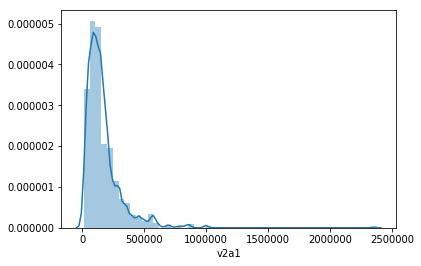

In [ ]:
sns.distplot(ds[ds.v2a1 > 0].v2a1)

In [ ]:
v2a1_max = ds.v2a1.std() * 3 + ds.v2a1.mean()
# ds = ds[ds.v2a1 < v2a1_max]
print(ds[ (ds.v2a1 < v2a1_max) | (ds.v2a1.isnull())].shape[0])
print(ds.shape[0])
print(ds[ (ds.v2a1 < v2a1_max) | (ds.v2a1.isnull())].shape[0] / ds.shape[0] - 1)
ds = ds[ (ds.v2a1 < v2a1_max) | (ds.v2a1.isnull())]

9494
9534
-0.004195510803440272


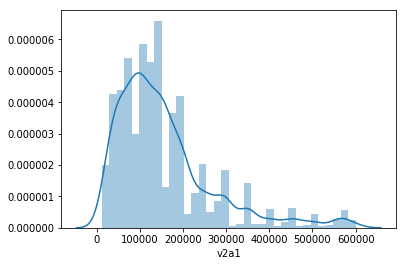

In [ ]:
sns.distplot(ds[ds.v2a1 > 0].v2a1)

### 2.7. Evaluar Cómo Comprimir los Datos Para su Almacenamiento Más Eficiente

In [ ]:
!pip install fastparquet

import os
def get_save_load(df, fmt):
    save = getattr(df, f'to_{fmt}')
    load = getattr(pd, f'read_{fmt}')
    return save, load
def size_of(filename, unit=1024**2):
    return round(os.stat(filename).st_size / unit, 2)

In [ ]:
formats = [
    ('hdf', {'key': 'data', 'format': 'table'}),
    ('pickle',),
    ('pickle',{"compression":"bz2"}),
    ('pickle',{"compression":"gzip"}),
    ('msgpack',),
    ('csv',),
    ('json',),
    ('parquet', {'engine': 'pyarrow'}),
    ('parquet', {'engine': 'fastparquet', "compression":"gzip"})
]


for case in formats:
  fmt, params = case if len(case) == 2 else (case[0], {})
  save, load = get_save_load(ds, fmt)
  filename = f'pobreza_costa_rica_step_bench_test.{fmt}'
  save(filename, **params)
  print(fmt, size_of(filename)) 

### 2.8. Guardar el Set de Datos con un Nombre Informativo

In [ ]:
ds.to_csv('pobreza_costa_rica_step2.csv')

## 3. Pasos de Limpieza Deseables

### 3.1. Ordenar Variables/Columnas

### 3.2. Quitar Variables/Columnas Irrelevantes

Tenemos alguna en este caso?

In [ ]:
ds

### 3.3. Renombrar Variables de Grillas

Esto se puede hacer de manera transparente a través de un diccionario.
Sugiero darles nombres más informativos a algunas columnas, como por ejemplo la de Renta Mensual y las de lugares. Como ayuda, sigue el diccionario de las columnas `lugar` con su nuevo nombre haciendo referencia directa a la región:

In [ ]:
# lugar1 =1 region Central
# lugar2 =1 region Chorotega
# lugar3 =1 region Pacífico central
# lugar4 =1 region Brunca
# lugar5 =1 region Huetar Atlántica
# lugar6 =1 region Huetar Norte

_col_dict = {
  'area1':'zona_urbana',
  'area2':'zona_rural', 
  'v2a1': 'monthly_rent',
  'lugar1': 'region_central',
  'lugar2': 'region_chorotega',
  'lugar3': 'region_pacifico_central',
  'lugar4': 'region_brunca',
  'lugar5': 'region_huetar_atlantica',
  'lugar6': 'region_huetar_norte'}
ds.rename(columns=_col_dict, inplace=True)
ds.head()

### 3.4. Categorizar Variables que Contengan “Otros”

### 3.5. Agregar Metadata a los Datos

Cuando y como fueron obtenidos, limpieza realizada, decisiones implementadas, asunciones, etc.

## II. Análisis en Profundidad del Contenido

### 1. Features Tipo Objetos

Primero nos quedamos con las features cuyo tipo es 'Objeto'.

In [ ]:
# Observamos los campos que tienen tipo 'Objeto'
_ds.dtypes[_ds.dtypes == 'object']

`Id` e `idhogar`, qué son?

In [ ]:
# Observamos los valores posibles del campo "Dependency"
_dep_arr = _ds['dependency'].unique()
_dep_arr.sort()
_dep_arr[::-1]

In [ ]:
# Observamos los valores posibles del campo "Edjefe"
_arr = _ds['edjefe'].unique()
_arr.sort()
_arr[::-1]

In [ ]:
# Analizamos el significado del campo "Edjefe"
_data_fields[_data_fields['Variable_name'] == 'edjefe']

In [ ]:
# Observamos los valores posibles del campo "Edjefa"
_arr = _ds['edjefa'].unique()
_arr.sort()
_arr[::-1]

### 2. Campos `tamhog` y `hhsize`

In [ ]:
# Tenemos dos campos iguales!!
_ds['tamhog'].equals(_ds['hhsize'])

### 3. Renta Mensual: Outliers

In [ ]:
ds_filtered =  _ds[_ds['parentesco1']==1]
ds_filtered['idhogar'].count()

In [ ]:
plt.figure(figsize=(30,15))

plt.subplot2grid((2,3),(0,0))
sns.distplot(ds_filtered[(ds_filtered['area1']==1)&(ds_filtered['Target']==1)]['v2a1'].dropna(), bins=10 ,label='Extrema Pobreza', hist=False)
sns.distplot(ds_filtered[(ds_filtered['area1']==1)&(ds_filtered['Target']==2)]['v2a1'].dropna(), bins=10 ,label='Pobreza Moderada', hist=False)
sns.distplot(ds_filtered[(ds_filtered['area1']==1)&(ds_filtered['Target']==3)]['v2a1'].dropna(), bins=10 ,label='Hogares Vulnerables', hist=False)
sns.distplot(ds_filtered[(ds_filtered['area1']==1)&(ds_filtered['Target']==4)]['v2a1'].dropna(), bins=10 ,label='Hogares No Vulnerables', hist=False)
plt.title('Distribucion de frecuencia de renta de jefes\n de hogar en zona urbana de acuerdo al nivel de pobreza')
plt.legend()
plt.ylim(0, 0.00002)

sns.despine()

plt.subplot2grid((2,3),(1,0))
sns.distplot(ds_filtered[(ds_filtered['area2']==1)&(ds_filtered['Target']==1)]['v2a1'].dropna(), bins=10 ,label='Extrema Pobreza', hist=False)
sns.distplot(ds_filtered[(ds_filtered['area2']==1)&(ds_filtered['Target']==2)]['v2a1'].dropna(), bins=10 ,label='Pobreza Moderada', hist=False)
sns.distplot(ds_filtered[(ds_filtered['area2']==1)&(ds_filtered['Target']==3)]['v2a1'].dropna(), bins=10 ,label='Hogares Vulnerables', hist=False)
sns.distplot(ds_filtered[(ds_filtered['area2']==1)&(ds_filtered['Target']==4)]['v2a1'].dropna(), bins=10 ,label='Hogares No Vulnerables', hist=False)
plt.title('Distribucion de frecuencia de la renta de jefes\n de hogar en zona rural de acuerdo al nivel de pobreza')
plt.legend()
plt.ylim(0, 0.00002)

sns.despine()

In [ ]:
plt.figure(figsize=(8,4))
sns.boxplot(data=ds_filtered, x='Target', y='v2a1')
plt.ylabel('Alquiler mensual')
plt.xlabel('Clase')
plt.xticks(rotation=45)
plt.ylim(0, 1200000)
plt.title("Boxplot de la renta de los hogares \n dependiendo el nivel de pobreza")
sns.despine()

In [ ]:
renta_outlier.sort_values('v2a1',ascending =False)[:3]

In [ ]:
renta_outlier = ds_filtered[ds_filtered['v2a1']>500000].sort_values('v2a1',ascending =False)
print("Cantidad de outliers: ",renta_outlier['v2a1'].count())
print("Cantidad de outliers correspondientes a Target 4: ",renta_outlier[renta_outlier['Target']==4]['v2a1'].count())

# Verificación de las características de los hogares mas extremos
renta_outlier.sort_values('v2a1',ascending =False)[:3]

renta_outlier.sort_values('v2a1',ascending =False)[:3][['v2a1','rooms','tamviv','escolari','paredblolad','pisomoscer','techozinc','cielorazo','epared3','etecho3','eviv3','hogar_total','bedrooms','tipovivi2','lugar1',	'lugar2','area1','Target']]


Se observa que la renta de los 3 hogares más extremos tienen características similares:
* Ubicadas en zona urbana
* 2 corresponden a región Central y la otra a región Chorotega
* Gran cantidad de habitaciones
* La pared es de bloque o ladrillo
* Piso de cerámico
* Techo de zinc
* Cielo razo.
* El techo, las paredes y el piso están en buen estado.
* Los jefes de hogar de dichas viviendas tiene educación superior.
* Las tres corresponden a propietarios con cuotas por pagar.

Podriamos considerar que no son outlier, pero primero estudiaremos las siguientes 27 hogares para verificar si tienen similares caracteristicas y decidir si eliminar dichos casos


In [ ]:
renta_outlier.sort_values('v2a1',ascending =False)[3:30][['v2a1','rooms','tamviv','escolari','paredblolad','pisomoscer','techozinc','cielorazo','epared3','etecho3','eviv3','hogar_total','bedrooms','tipovivi2','tipovivi3','lugar1','area1','Target']].head()

Llama la atención que la mayoría de los hogares se situan en región central y en zona urbana.

Si nos basamos en el monto estimado que se informa en https://preciosmundi.com/costa-rica/precio-vivienda-salarios
entonces  estos outliers (expresada en moneda local) no podría ser considerada como valores atipicos.

In [ ]:
ds_filtered_out = ds_filtered[np.abs(ds_filtered.v2a1-ds_filtered.v2a1.mean()) <= (3*ds_filtered.v2a1.std())]

plt.figure(figsize=(8,4))
sns.boxplot(data=ds_filtered_out, x='Target', y='v2a1')
plt.ylabel('Alquiler mensual')
plt.xlabel('Clase')
plt.xticks(rotation=45)
plt.ylim(0, 1200000)
plt.title("Boxplot de la renta de los hogares \n dependiendo el nivel de pobreza")
sns.despine()

### 4. Renta Mensual y Tipo de Vivienda

In [ ]:
ds_filtered =  _ds[_ds['parentesco1']==1]

print("Cantidad de hogares con tipo vivienda 1: ", ds_filtered[ds_filtered['tipovivi1']==1]['v2a1'].count())
print("Cantidad de hogares con tipo vivienda 2: ", ds_filtered[ds_filtered['tipovivi2']==1]['v2a1'].count())
print("Cantidad de hogares con tipo vivienda 3: ", ds_filtered[ds_filtered['tipovivi3']==1]['v2a1'].count())
print("Cantidad de hogares con tipo vivienda 4: ", ds_filtered[ds_filtered['tipovivi4']==1]['v2a1'].count())
print("Cantidad de hogares con tipo vivienda 5: ", ds_filtered[ds_filtered['tipovivi5']==1]['v2a1'].count())

print("Total: ",_ds[_ds['parentesco1']==1].shape[0])


Los únicos que tienen el campo renta distinto de nulo son aquellos que tienen tipo vivienda 2 y 3. Y corresponden a aquellos que alquilan o son propietarios con cuota adeudada. 

### 5. Renta Mensual: Valores Faltantes

El tratamiento de los faltantes se realizará calculando el costo oportunidad de la vivienda teniendo en cuenta las siguientes variables:
* Region
* zona
* rooms 
* bedrooms
* estado de la pared, piso y techo

Teniendo en cuenta el registro al cual se le quiere registrar la renta, se buscarán aquellas viviendas que tengan las mismas características, y se calculará la media de la renta de las mismas.

In [ ]:
def get_region(input):
  if((input.region_central ==1)[0]):
    return 'region_central'
  elif((input.region_chorotega ==1)[0]):
    return 'region_chorotega'
  elif((input.region_pacifico_central==1)[0]):
    return 'region_pacifico_central'
  elif((input.region_brunca==1)[0]):
    return 'region_brunca'
  elif((input.region_huetar_atlantica==1)[0]):
    return 'region_huetar_atlantica'
  
def get_zona(input):
  if((input.zona_urbana==1)[0]):
    return 'zona_urbana'
  elif((input.zona_rural==1)[0]):
    return 'zona_rural'
  
def get_estado_piso(input):
  if((input.eviv1==1)[0]):
    return 'eviv1'
  elif((input.eviv2==1)[0]):
    return 'eviv2'
  elif((input.eviv3==1)[0]):
    return 'eviv3'
    
def get_costo_de_oportunidad(input):
  region = get_region(input)
  zona = get_zona(input)
  estado_piso = get_estado_piso(input)
  rooms = input['rooms'][0]
  return ds[(ds[region]==1)&(ds[zona]==1)&(ds['rooms']==rooms)]['monthly_rent'].mean()

serie = ds[:1]
print(get_costo_de_oportunidad(serie))
#(serie.region_central==1)[0]


In [ ]:
ds.head()

### 6. Datos Únicos por `idhogar`

### 7. Individuos por Hogar

### 8. `rooms` y `bedrooms`

In [ ]:
_ds['rooms'].equals(_ds['bedrooms'])

### 9. Jef@s de Hogar por `idhogar`

### 10. Adicional